slope: 0.2455914165960773 +- 0.0036527371401189695
y-int: -1.3448363183447956 +- 0.0204704384522644


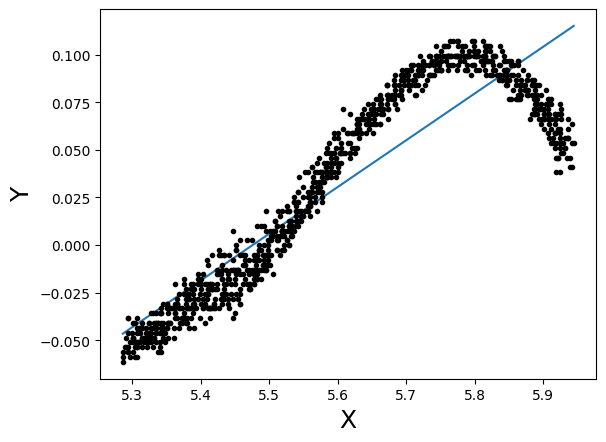

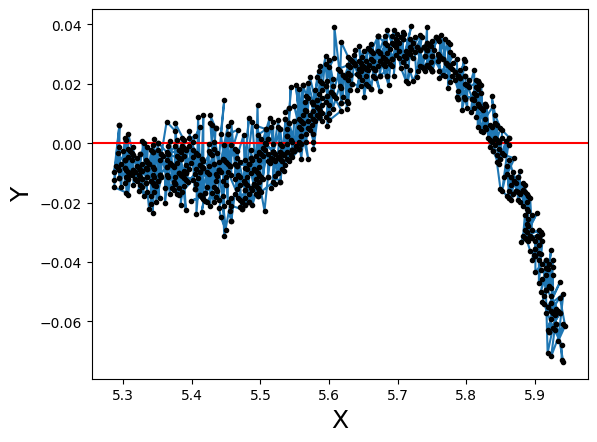

0.1070992


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

data_file = 'calibrate_main_equi2.csv'

xdata, ydata  = np.loadtxt(                 
        data_file,                                # file to read
        delimiter = ',',                         # specify delimiting character
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 2),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.
def func(x,m,b):                                # Define your fitting function

    return m*x+b                     
 
initialguess = [1,1]                     # initial guess for the parameters of the function func

fit, covariance = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        func,                                     # function to fit
        xdata,                                    # data for independant variable
        ydata,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameter

print("slope:",fit[0],"+-",np.sqrt(covariance[0][0]))     #print value and one std error of the first fit parameter
print("y-int:",fit[1],"+-",np.sqrt(covariance[1][1]))     #print value and one std error of the second fit parameter

##########
# Plotting data and fit
##########

xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=func(xdatafit,*fit)                     # create discrete data set from fitting function

plt.clf()                                         # clear plot figure
plt.plot(xdatafit, func_plot)                     # plot the fit function 
plt.errorbar(xdata, ydata, fmt='k.')        # plot data with error bars, define format of plot (k=black)
#plt.title('Best Fit Linear Equation')             # plot title
plt.xlabel('X',fontsize = 18)                     # label x axis
plt.ylabel('Y',fontsize = 18)                     # label y axis
#plt.xlim(np.min(xdata),np.max(xdata))             # choose limits of x or y axis 
#plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis                                          
plt.savefig('./dataWithFit',dpi=300)         # save figure of plot
plt.show()                                        # show plot

##########
# Plotting residuals
##########

func_model=func(xdata,*fit)              # create discrete data set from fitting function
residual = (ydata-func_model)                  # create array of residual data

plt.clf()   
plt.errorbar(xdata, residual, fmt='k.')
plt.plot(xdata, residual)  
plt.axhline(y=0.0, color='r', linestyle='-') 
#plt.title('Residual')
plt.xlabel('X',fontsize = 18)
plt.ylabel('Y',fontsize = 18)
plt.savefig('./Residual.pdf',dpi=300)         # save figure of plot
plt.show()

print(max(ydata))